In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys

ROOT_DIR = '..'
sys.path.append(ROOT_DIR)

In [4]:
from utils.evolution_functions import generate_random_samples
from utils.statistic_utils import run_chi_squared_test

# Implementação 4

Dados de entrada:
- Valores adaptativos / coeficientes de seleção
- Frequências alélicas iniciais
- Número de gerações (iterar até o ponto de equilíbrio)
### Gráficos com diferentes p iniciais, pelo menos p0 = 0.5
- p x T e p x AA, Aa, aa
- Δp x p
- Paisagem adaptativa: wmed x p

In [9]:
def next_gen(p2, pq, q2, wAA, wAa, waa):
    # Calcular frequência ajustada
    wAA_adj = wAA * p2
    wAa_adj = wAa * pq
    waa_adj = waa * q2

    # Calcular aptidão média
    w_med = wAA_adj + wAa_adj + waa_adj

    wAA_apos = wAA_adj / w_med
    wAa_apos = wAa_adj / w_med
    waa_apos = waa_adj / w_med

    # Calcular frequência após
    p1 = wAA_apos + 0.5 * wAa_apos
    q1 = 1 - p1

    return p1, q1, w_med

def calc_freq(p0, q0):
    p2 = p0**2
    pq = 2*p0*q0
    q2 = q0**2
    return p2, pq, q2

def run(p0, q0, wAA, wAa, waa, n_gen):
    decimals = 10
    N = 1e9
    n = 1
    p2, pq, q2 = calc_freq(p0, q0)

    p_list = []
    q_list = []
    p2_list = []
    pq_list = []
    q2_list = []
    delta_p = []
    w_med_list = []

    p_list.append(p0)
    q_list.append(q0)
    p2_list.append(p2)
    pq_list.append(pq)
    q2_list.append(q2)

    expected = generate_random_samples(p0, q0, N)

    ehw_gens = {}
    dict_key = f'{wAA}_{wAa}_{waa}'
    for i in range(n_gen):
        p, q, w_med = next_gen(p2_list[i], pq_list[i], q2_list[i], wAA, wAa, waa)
        p2, pq, q2 = calc_freq(p, q)

        # print(w_med)
        # print(p, q)
        # print(p2, pq, q2)

        # if round(p, decimals) == round(p_list[i], decimals):
        #     print(f'Equilíbrio atingido em {i}?')
        #     break
        observed = generate_random_samples(p, q, N)
        chi_2, is_correlated = run_chi_squared_test(observed, expected, n)
        if not is_correlated and not ehw_gens.get(dict_key, None):
            ehw_gens[dict_key] = i


        delta_p.append(abs(p - p_list[i]))
        p_list.append(p)
        q_list.append(q)
        p2_list.append(p2)
        pq_list.append(pq)
        q2_list.append(q2)
        w_med_list.append(w_med)

    print(delta_p)
    # No plot, marcar quando sai do EHW...

    # Plot da paisagem adaptativa
    plt.figure(figsize=(16, 9))

    plt.subplot(2, 3, 1)
    plt.plot(p_list, label='p')
    plt.plot(q_list, label='q')
    plt.axvline(x=ehw_gens[dict_key], color='r', linestyle='--', label='EHW')
    plt.title("P e Q por T")
    plt.legend()


    plt.subplot(2, 3, 2)
    plt.plot(p2_list, label='p2')
    plt.plot(pq_list, label='pq')
    plt.plot(q2_list, label='q2')
    plt.title("P², PQ e Q² por T")
    plt.axvline(x=ehw_gens[dict_key], color='r', linestyle='--', label='EHW')
    plt.legend()

    plt.subplot(2, 3, 3)
    plt.plot(w_med_list, label='w_med')
    plt.title("w médio por T")
    plt.axvline(x=ehw_gens[dict_key], color='r', linestyle='--', label='EHW')
    plt.legend()
    plt.show()

    plt.figure(figsize=(16, 9))

    plt.subplot(2, 3, 1)
    plt.plot(p_list, p2_list, label='p x AA')
    plt.legend()

    plt.subplot(2, 3, 2)
    plt.plot(p_list, pq_list, label='p x Aa')
    plt.legend()

    plt.subplot(2, 3, 3)
    plt.plot(p_list, q2_list, label='p x aa')
    plt.legend()
    plt.show()

    # plt.figure(figsize=(10, 10))
    plt.plot(w_med_list, p_list[1:], label='w_med x p')
    plt.legend()
    plt.show()

    # plt.figure(figsize=(10, 10))
    plt.plot(delta_p, label='delta_p x T')
    plt.legend()
    plt.show()


# Caso 1:
- Dominância: wAA = 1; wAa = 1; waa = 0,9

[0.012820512820512886, 0.012467385354448468, 0.012110354512774979, 0.011751832505015436, 0.01139393420356083, 0.011038490535127399, 0.010687065800010775, 0.010340977551553165, 0.010001317901207174, 0.009668975338489205, 0.009344656360048553, 0.009028906382476665, 0.008722129567117598, 0.008424607312158106, 0.00813651526934589, 0.007857938822362631, 0.007588887024186919, 0.007329305034765032, 0.007079085130937801, 0.006838076380493163, 0.006606093083808107, 0.006382922091769605, 0.006168329109210169, 0.005962064090274777, 0.005763865827044579, 0.005573465826185564, 0.005390591561017399, 0.0052149691786677055, 0.0050463257342361345, 0.00488439101637228, 0.0047288990215420545, 0.004579589127593042, 0.004436207011115023, 0.004298505347515524, 0.0041662443277104, 0.004039192020839577, 0.003917124608420752, 0.0037998265118314167, 0.0036870904319055153, 0.003578717316712776, 0.003474516271224637, 0.0033743044205066797, 0.003277906736299907, 0.003185155835305764, 0.0030958917561669796, 0.00300

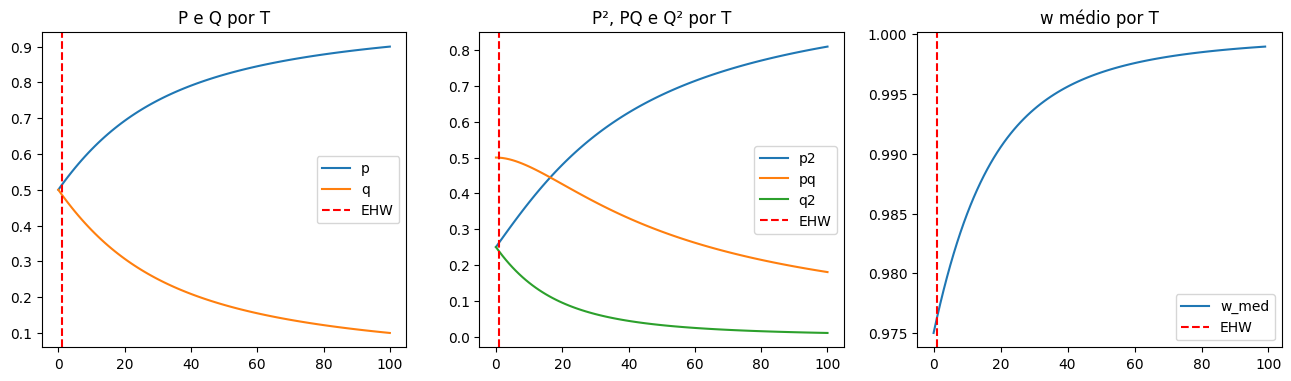

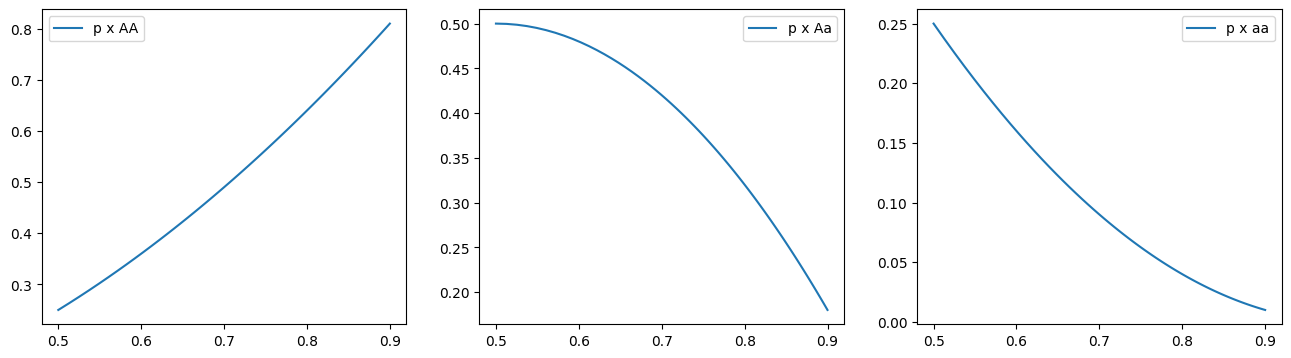

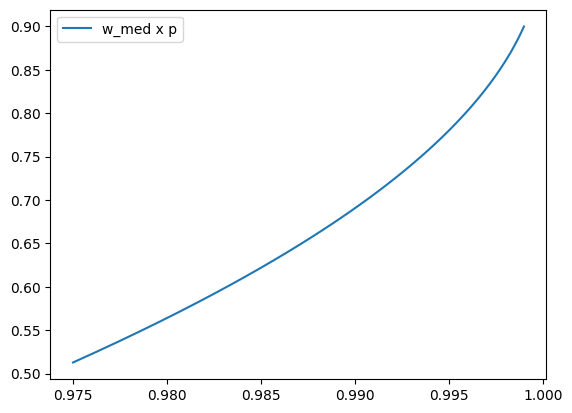

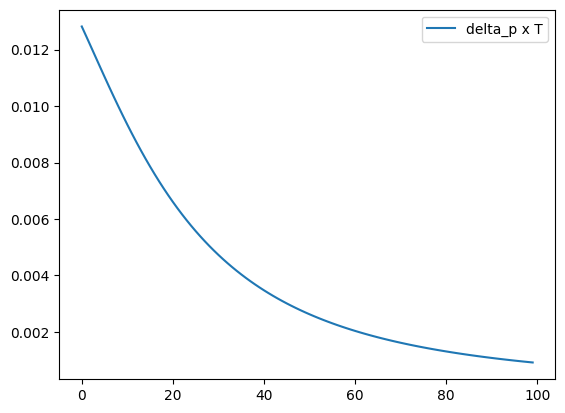

In [10]:
wAA = 1
wAa = 1
waa = 0.9

p0 = 0.5
q0 = 1 - p0

n_gen = int(100)

run(p0, q0, wAA, wAa, waa, n_gen)

# Mesmo gráfico com diferentes valores de P

# Caso 2:
- Codominância: wAa = (wAA + waa)/2


[0.010824742268041254, 0.010583700844322197, 0.010336892153778032, 0.010085246418802596, 0.009829670520137307, 0.009571042911275807, 0.009310209181436241, 0.009047978270933815, 0.008785119331605001, 0.008522359215105774, 0.00826038056349987, 0.007999820469611257, 0.007741269669108347, 0.007485272222174738, 0.007232325639802084, 0.006982881408118258, 0.006737345863605304, 0.006496081372432655, 0.006259407768294478, 0.006027604004956472, 0.005800909982052765, 0.005579528505403386, 0.005363627346132369, 0.0051533413660534155, 0.004948774680061108, 0.004750002829547406, 0.004557074944087566, 0.004370015871756144, 0.00418882826140049, 0.004013494582984806, 0.003843979074702228, 0.0036802296079206515, 0.0035221794631734443, 0.0033697490123293233, 0.0032228473037784894, 0.003081373548963033, 0.0029452185098695557, 0.0028142657882011674, 0.0026883930178713544, 0.002567472963224973, 0.0024513745260099987, 0.002339963664609007, 0.0022331042294102127, 0.0021306587184642123, 0.0020324889577508776,

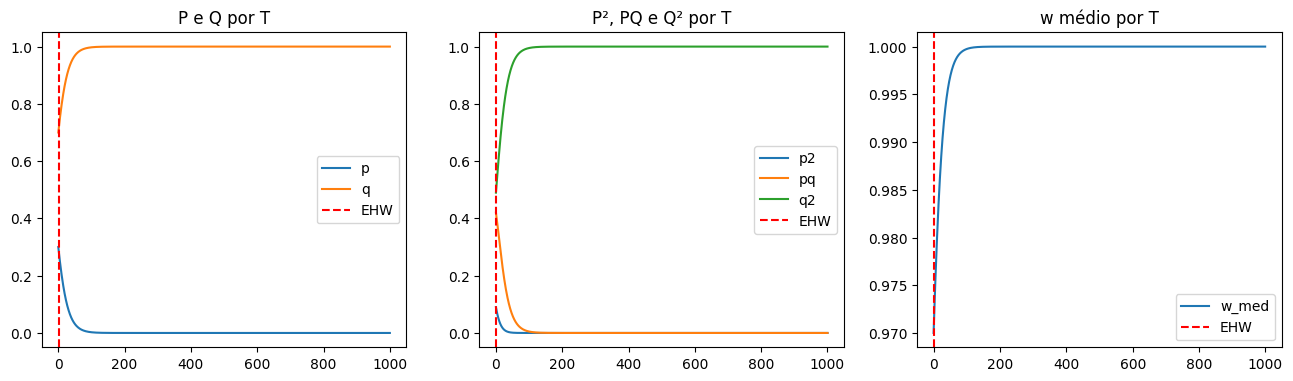

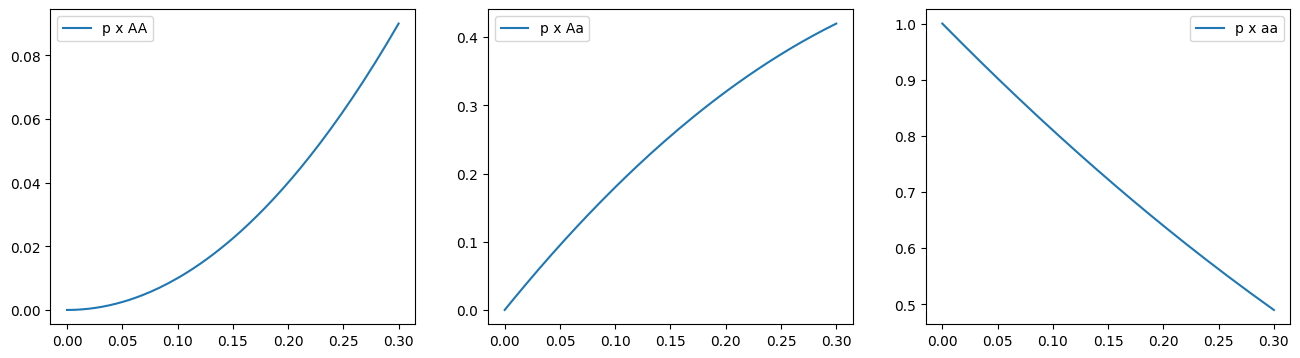

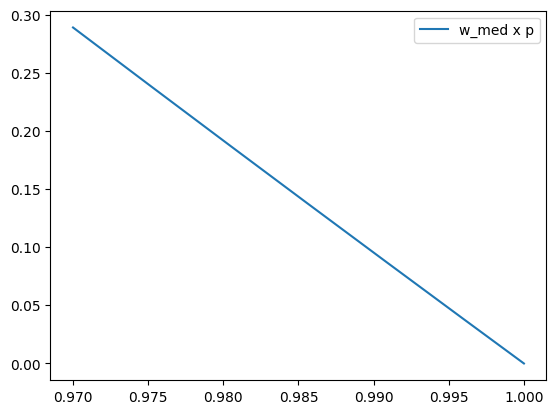

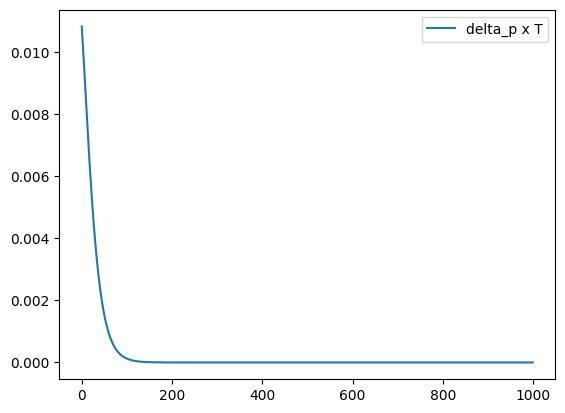

In [11]:
wAA = 0.9
waa = 1
wAa = (wAA + waa)/2

p0 = 0.3
q0 = 1 - p0

n_gen = int(1000)

run(p0, q0, wAA, wAa, waa, n_gen)

# Caso 3:
- Sobredominância: wAA = 0,9; wAa = 1; waa = 0,9


[0.008917197452229297, 0.008654688219266626, 0.008382057445923796, 0.008102049131241795, 0.007817178531194569, 0.0075297185210597695, 0.007241694734243853, 0.006954887871454707, 0.0066708416223881795, 0.00639087476346456, 0.006116096161179141, 0.005847421598118019, 0.005585591529971068, 0.005331189064507802, 0.00508465761956467, 0.004846317862306382, 0.0046163836548043236, 0.004394976831636477, 0.004182140715338845, 0.003977852337377685, 0.0037820333784366333, 0.0035945598748381435, 0.00341527076028747, 0.0032439753260646853, 0.0030804596902311854, 0.002924492368963416, 0.002775829042133915, 0.002634216601791861, 0.002499396567089529, 0.002371107943121342, 0.0022490895945542766, 0.002133082198211844, 0.002022829832155182, 0.0019180812524824953, 0.0018185909031248615, 0.0017241196984341123, 0.0016344356133597415, 0.0015493141114918396, 0.0014685384372112864, 0.001391899794593754, 0.0013191974325461597, 0.0012502386528634446, 0.001184838755464268, 0.0011228209329359196, 0.001064016124685

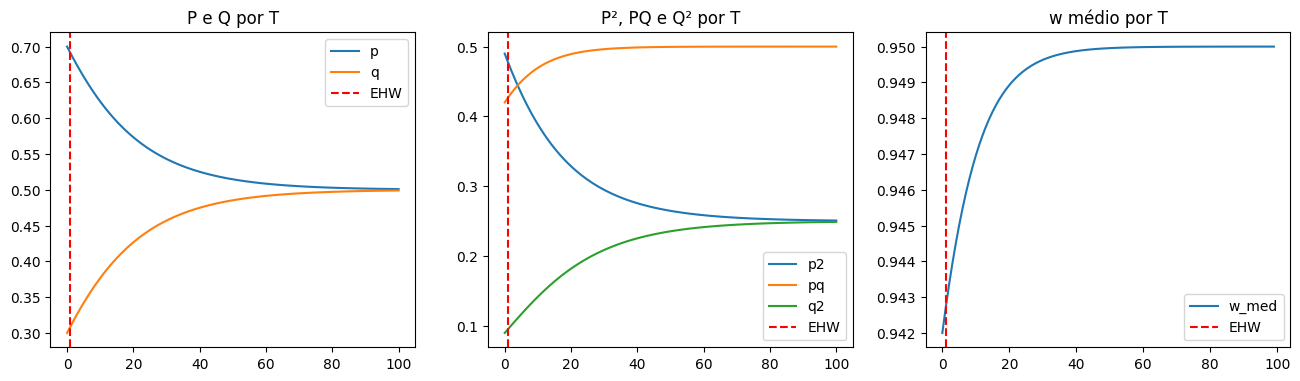

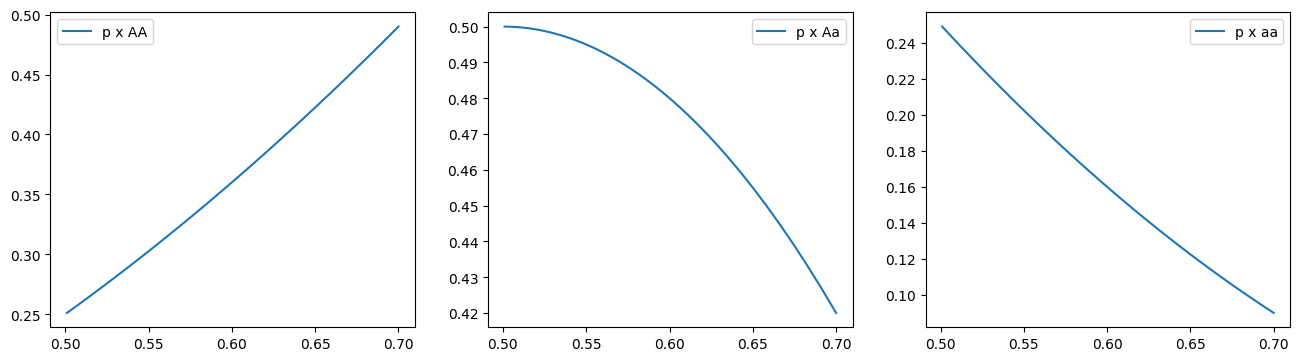

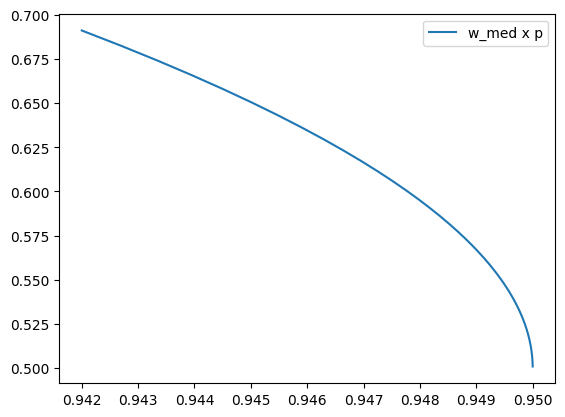

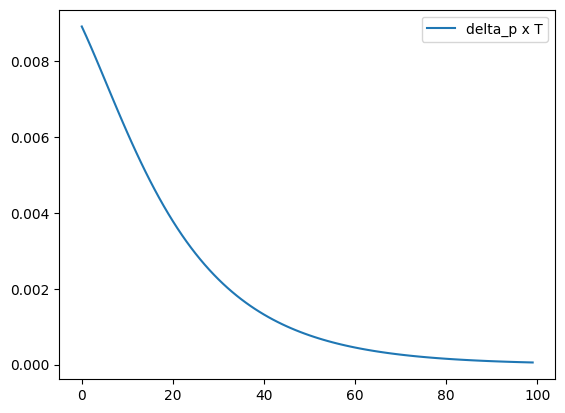

In [12]:
wAA = 0.9
wAa = 1
waa = 0.9

p0 = 0.7
q0 = 1 - p0

n_gen = int(100)

run(p0, q0, wAA, wAa, waa, n_gen)

# Caso 4:
- Desvantagem do heterozigoto: wAA = 1; wAa = 0,9; waa = 1

[0.008768267223381976, 0.008989739077052583, 0.009195306259554226, 0.009382148847064009, 0.009547413168342178, 0.009688273475986442, 0.00980200252146246, 0.0098860492734002, 0.009938121198054595, 0.009956267729009372]


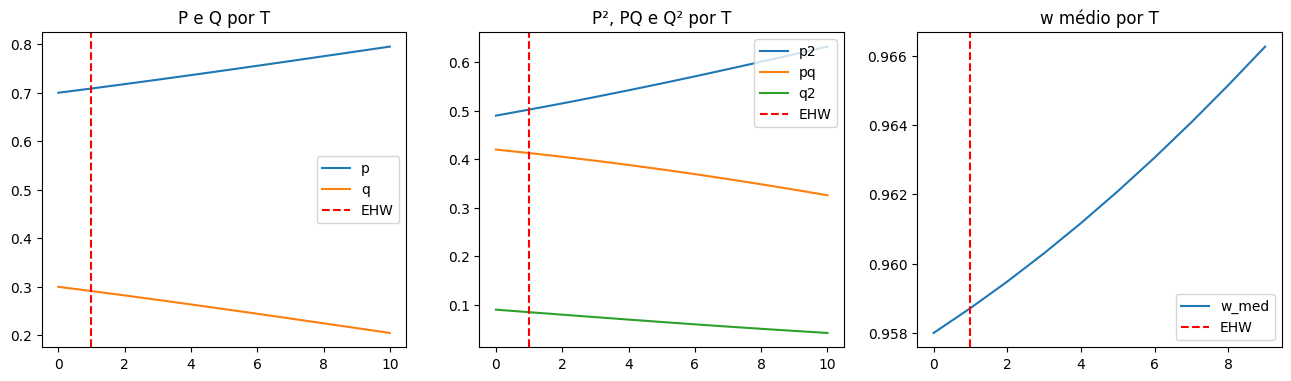

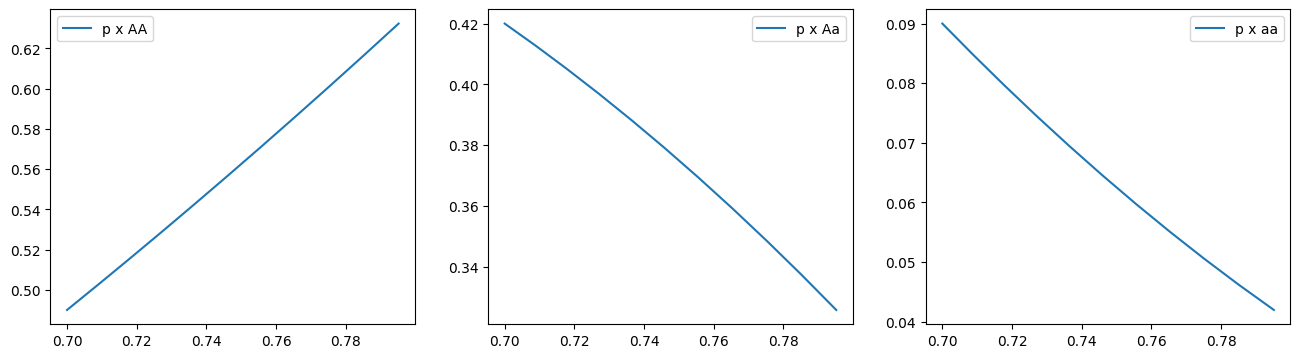

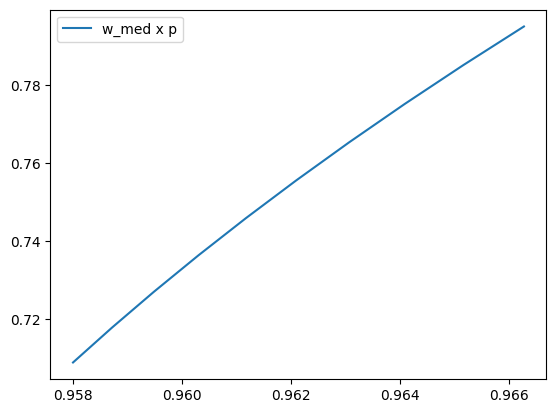

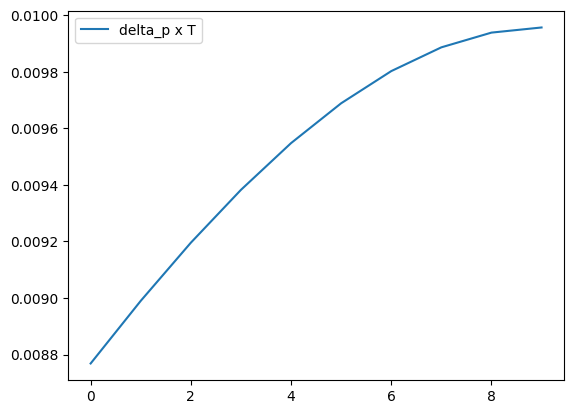

In [13]:
wAA = 1
wAa = 0.9
waa = 1

p0 = 0.7
q0 = 1 - p0

n_gen = int(10)

run(p0, q0, wAA, wAa, waa, n_gen)